<a href="https://colab.research.google.com/github/rizvanasherf/NLP_tryouts/blob/main/nlp_model_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
#dataset
df = pd.read_csv('/content/IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
#checking basic structure of the data Frame
df.shape

(50000, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
# checking for duplicate
df.duplicated().sum()

418

In [6]:
# deleating the duplicaet review
df.drop_duplicates(inplace = True)


In [7]:
df['sentiment'].value_counts()

,count
sentiment,
positive,24884
negative,24698


In [8]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

- there is a lot of html tags and all , so we need to clean the data

In [9]:
#converting to lower case
df['review'] = df['review'].apply(lambda x : x.lower())

In [10]:
#removing unwanted tags
import re
def cleaning_text(text):
    sent=re.sub(r'<.*?>','',text)
    sent = re.sub('[^a-zA-Z\s]','',text)
    return sent

df['review']=df['review'].apply(cleaning_text)

In [11]:
#cleaned text
df['review'][0]

'one of the other reviewers has mentioned that after watching just  oz episode youll be hooked they are right as this is exactly what happened with mebr br the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordbr br it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awaybr br i would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare for

- We removed all the tags and punchuations from the sentences , now we have to take the baisc processing steps like tokenization,limmatizations etc

In [12]:
#tokenizing
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('punkt_tab')

df['token'] = df['review'].apply(word_tokenize)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [13]:
# removing stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = stopwords.words('english')

df['token'] = df['token'].apply(lambda x : [words for words in x if words not in stop_words])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
#lemmatizing
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lr =WordNetLemmatizer()

df['token'] =df['token'].apply(lambda x: [ lr.lemmatize(word,'v') for word in x])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
df['cleaned_'] = df['token'].str.join(' ')

<Axes: xlabel='sentiment', ylabel='count'>

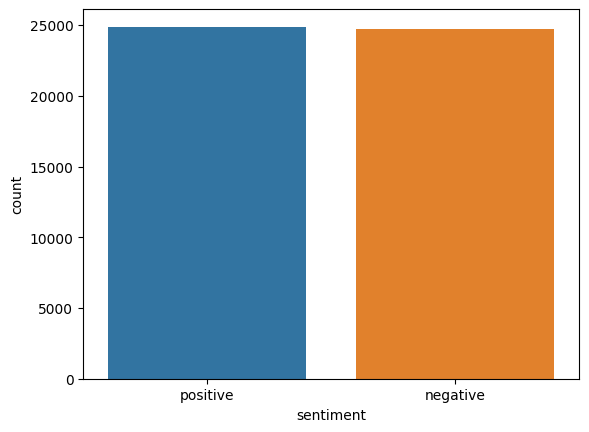

In [16]:
#EDA
import seaborn as sns

sns.countplot(data =df ,x ='sentiment',hue='sentiment')

In [17]:
#converting to numerical
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(max_features=5000)
x= tf.fit_transform(df['cleaned_']).toarray()



In [18]:
y = df['sentiment'].map({'negative':0,'positive':1})

In [19]:
# modeling
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
mb= MultinomialNB()
mb.fit(x_train,y_train)

MultinomialNB()

In [21]:
ypred = mb.predict(x_test)

In [29]:
#perfomance
accuracy = accuracy_score(y_test,ypred)
print(f'accuracy : {accuracy}')

accuracy : 0.8471311888676011


In [31]:
import numpy as np
report_dict = classification_report(y_test, ypred, output_dict=True)

# Convert to a DataFrame
report_df = pd.DataFrame(report_dict).T

# Display the transposed DataFrame
print(report_df)

              precision    recall  f1-score      support
0              0.849642  0.842073  0.845841  4939.000000
1              0.844683  0.852149  0.848400  4978.000000
accuracy       0.847131  0.847131  0.847131     0.847131
macro avg      0.847163  0.847111  0.847120  9917.000000
weighted avg   0.847153  0.847131  0.847126  9917.000000
